This notebook is referenced from https://www.edureka.co/blog/tensorflow-tutorial/

Linear Regression Model is used for predicting the unknown value of a variable (Dependent Variable) from the known value of another variables (Independent Variable) using linear regression equation as shown below:
Y = wx +b

In [2]:
import tensorflow as tf

In [3]:
# Creating variable for parameter slope (W) with initial value as 0.4
W = tf.Variable([.4], tf.float32)
 
#Creating variable for parameter bias (b) with initial value as -0.4
b = tf.Variable([-0.4], tf.float32)
 
# Creating placeholders for providing input or independent variable, denoted by x
x = tf.placeholder(tf.float32)
 

In [4]:
# Equation of Linear Regression
linear_model = W * x + b

In [5]:
# Initializing all the variables
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [13]:
# Running regression model to calculate the output w.r.t. to provided x values
print(sess.run(linear_model, {x: [1, 2, 3, 4]})) 

[0.        0.4       0.8000001 1.2      ]


The above stated code just represents the basic idea behind the implementation of regression model i.e. how you follow the equation of regression line so as to get output w.r.t. a set of input values. But, there are two more things left to be added in this model to make it a complete regression model:

- First, we need to provide a mechanism by which our model can train itself automatically based on given set of inputs and respective outputs.
- Second thing that we need is to validate our trained model by comparing its output with the desired or target output based on given set of x values.

Now let us understand how can I incorporate the above stated functionalities into my code for regression model. 



### Loss Function – Model Validation
A loss function measures how far apart the current output of the model is from that of the desired or target output. I’ll use a most commonly used loss function for my linear regression model called as Sum of Squared Error or SSE. SSE calculated w.r.t. model output (represent by linear_model) and desired or target output (y) as:
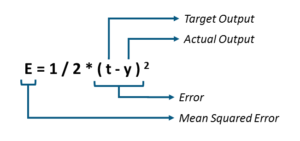



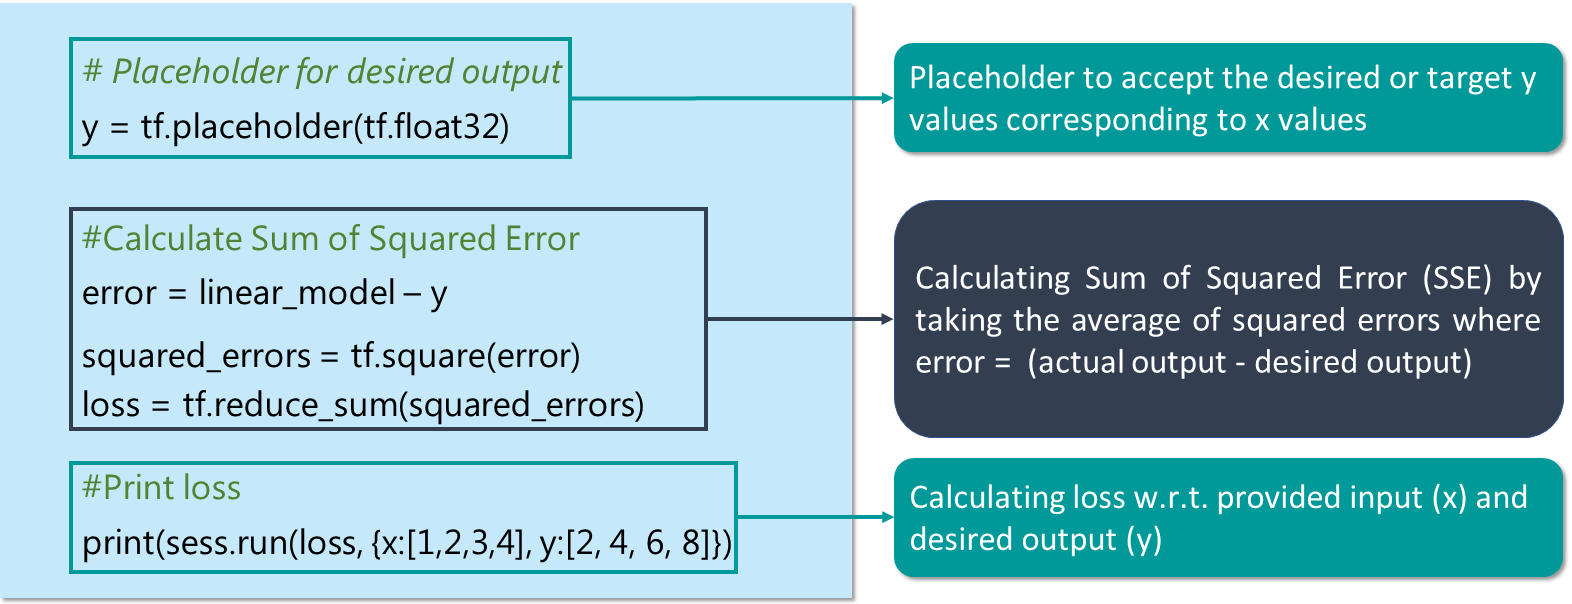


In [14]:
linear_model

<tf.Tensor 'add:0' shape=<unknown> dtype=float32>

In [17]:
y = tf.placeholder(tf.float32)
error = linear_model - y
squared_errors = tf.square(error)
loss = tf.reduce_sum(squared_errors)
print(sess.run(loss, {x:[1,2,3,4], y:[2,4,6,8]}))

90.24


As you can see, we are getting a high loss value. Therefore, we need to adjust our weights (W) and bias (b) so as to reduce the error that we are receiving.

### tf.train API – Training the Model
TensorFlow provides optimizers that slowly change each variable in order to minimize the loss function or error. The simplest optimizer is gradient descent. It modifies each variable according to the magnitude of the derivative of loss with respect to that variable. 
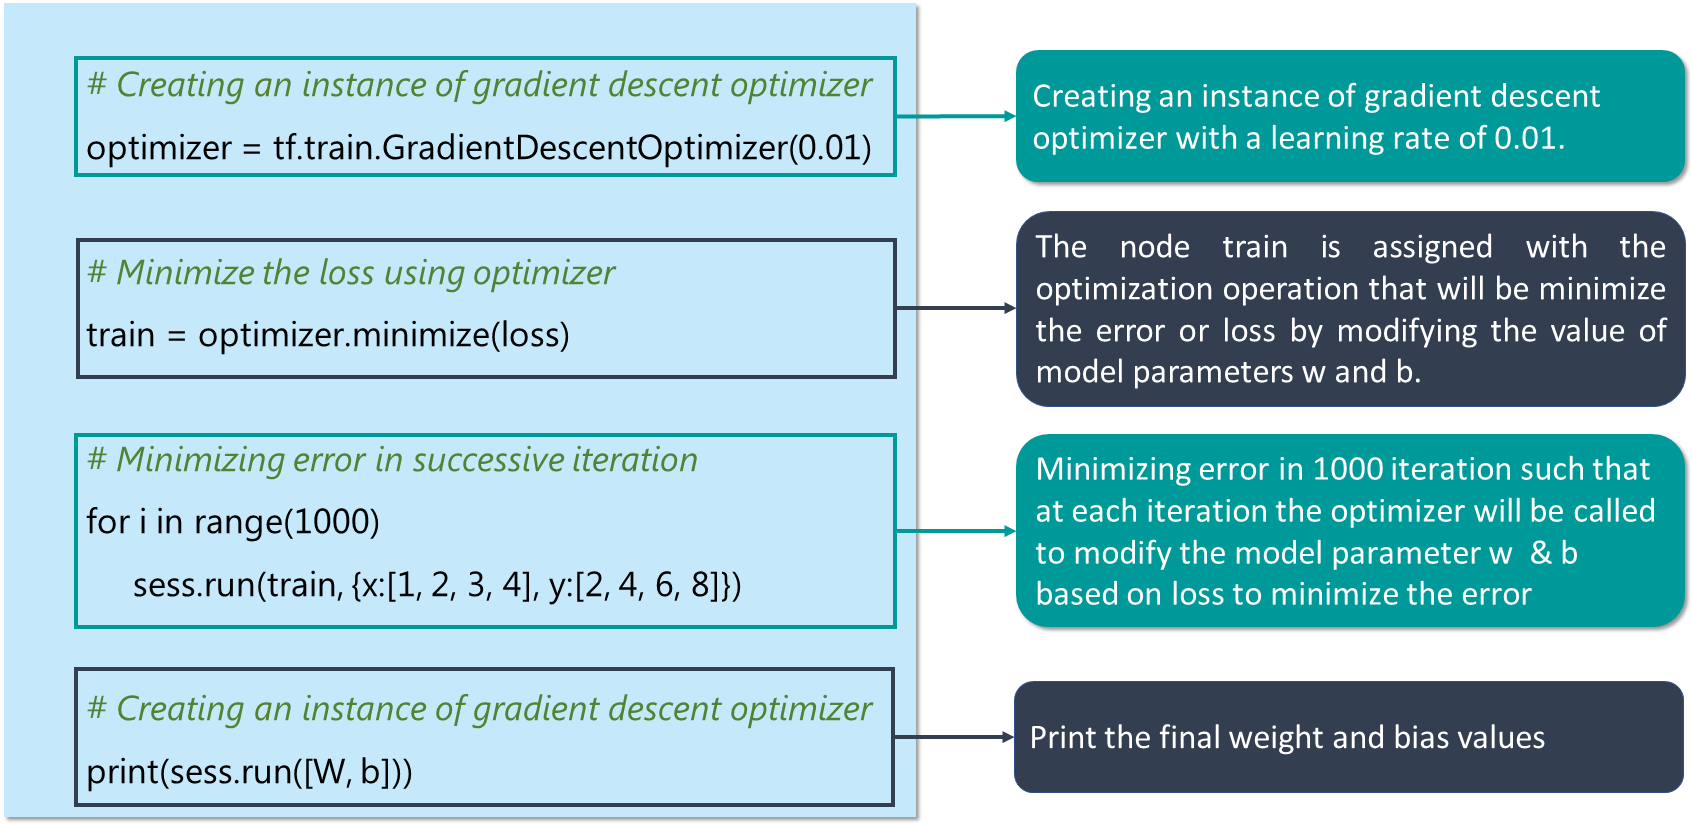

In [18]:
#Creating an instance of gradient descent optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01)
 
train = optimizer.minimize(loss)
 
for i in range(1000):
     sess.run(train, {x:[1, 2, 3, 4], y:[2, 4, 6, 8]})
print(sess.run([W, b]))

[array([1.9999996], dtype=float32), array([9.863052e-07], dtype=float32)]
